# Machine Learning Pipeline - Model Training

In this notebook, we pick up the `xtrain.csv` and `xtest.csv` that we saved in the previous notebooks.

# Reproducibility: Setting the seed

With the aim to ensure reproducibility between runs of the same notebook, but also between the research and production environment, for each step that includes some element of randomness, it is extremely important that we **set the seed**.

In [1]:
# to handle datasets
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# for the yeo-johnson transformation
import scipy.stats as stats

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to save the trained scaler class
import joblib

# to build the model
from sklearn.linear_model import Lasso

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)
#pd.pandas.set_option('display.max_rows', None)

In [2]:
# load the train and test set with the engineered variables that 

X_train = pd.read_csv('../Data/xtrain.csv')
X_test = pd.read_csv('../Data/xtest.csv')

X_train.head()

,Location1,Type,Bedrooms,Bathrooms,Size_in_SqYds,Parking_Spaces,Floors_in_Building,Elevators,Lobby_in_Building,Double_Glazed_Windows,Central_Air_Conditioning,Central_Heating,Waste_Disposal,Furnished,Service_Elevators_in_Building,Flooring,Electricity_Backup,Servant_Quarters,Study_Room,Prayer_Room,Powder_Room,Gym,Lounge_or_Sitting_Room,Laundry_Room,Business_Center_or_Media_Room_in_Building,Satellite_or_Cable_TV_Ready,Broadband_Internet_Access,Intercom,Conference_Room_in_Building,Community_Swimming_Pool,Community_Lawn_or_Garden,Community_Gym,Community_Center,First_Aid_or_Medical_Centre,Day_Care_center,Kids_Play_Area,Mosque,Barbeque_Area,Lawn_or_Garden,Swimming_Pool,Sauna,Jacuzzi,Nearby_Schools,Nearby_Hospital,Nearby_Shopping_Malls,Nearby_Restaurants,Nearby_Public_Transport_Service,Other_Nearby_Places,Security_Staff,Maintainance_Staff,Laundry_or_Dry_Cleaning_Facility,Facilities_for_Disabled,Bedrooms_na,Bathrooms_na,Size_in_SqYds_na,Floors_in_Building_na,Elevators_na,Built_in_year_year_na,Yrs_SinceBlt
0,0.363636,0.0,0.2,0.333333,0.362916,0.010,0.208333,0.045455,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000
1,0.545455,1.0,0.5,0.555556,0.360900,0.002,0.229167,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.583333
2,0.181818,0.0,0.2,0.222222,0.290589,0.000,0.229167,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.187500
3,0.181818,1.0,0.4,0.444444,0.326943,0.000,0.229167,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.187500
4,0.181818,0.0,0.1,0.111111,0.088235,0.000,0.229167,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.187500


In [3]:
# load the target (remember that the target is log transformed)
y_train = pd.read_csv('../Data/ytrain.csv')
y_test = pd.read_csv('../Data/ytest.csv')

y_train.head()

,Price_in_millions
0,3.610918
1,4.248495
2,2.484907
3,3.860730
4,0.530628


In [4]:
y_test.head()

,Price_in_millions
0,1.335001
1,3.960813
2,2.833213
3,1.945910
4,2.694627


In [5]:
# load the pre-selected features
# ==============================

# we selected the features in the previous notebook (step 2)

features = pd.read_csv('../Data/selected_features.csv')
features = features['0'].to_list() 

# display final feature set
features

['Location1',
 'Type',
 'Bedrooms',
 'Bathrooms',
 'Size_in_SqYds',
 'Floors_in_Building',
 'Lobby_in_Building',
 'Double_Glazed_Windows',
 'Central_Heating',
 'Service_Elevators_in_Building',
 'Flooring',
 'Electricity_Backup',
 'Servant_Quarters',
 'Study_Room',
 'Powder_Room',
 'Gym',
 'Lounge_or_Sitting_Room',
 'Laundry_Room',
 'Business_Center_or_Media_Room_in_Building',
 'Broadband_Internet_Access',
 'Intercom',
 'Conference_Room_in_Building',
 'Community_Lawn_or_Garden',
 'Community_Gym',
 'First_Aid_or_Medical_Centre',
 'Kids_Play_Area',
 'Mosque',
 'Nearby_Shopping_Malls',
 'Nearby_Restaurants',
 'Other_Nearby_Places',
 'Security_Staff',
 'Bedrooms_na',
 'Bathrooms_na',
 'Size_in_SqYds_na',
 'Floors_in_Building_na',
 'Elevators_na',
 'Built_in_year_year_na']

In [6]:
len(features)

37

In [7]:
len(X_train.columns)

59

In [8]:
# reduce the train and test set to the selected features

X_train = X_train[features]
X_test = X_test[features]

### Regularised linear regression: Lasso

Remember to set the seed.

In [9]:
# set up the model
# remember to set the random_state / seed

lin_model = Lasso(alpha = 0.001, random_state = 0)

# train the model

lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=0)

In [10]:
# evaluate the model:
# ====================

# remember that we log transformed the output (Price) in our feature engineering notebook (step 2).

# In order to get the true performance of the Lasso we need to transform both the target and the predictions back to the original house prices values.

# We will evaluate performance using the mean squared error and the root of the mean squared error and r2

# make predictions for train set
pred = lin_model.predict(X_train)

# determine mse, rmse and r2
print('train mse: {}'.format(int(mean_squared_error(np.exp(y_train), np.exp(pred)))))

print('train rmse: {}'.format(int(mean_squared_error(np.exp(y_train), np.exp(pred), squared = False))))

print('train r2: {}'.format(r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = lin_model.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(int(mean_squared_error(np.exp(y_test), np.exp(pred)))))

print('test rmse: {}'.format(int(mean_squared_error(np.exp(y_test), np.exp(pred), squared = False))))

print('test r2: {}'.format(r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 1133
train rmse: 33
train r2: 0.6628159325258981

test mse: 996
test rmse: 31
test r2: 0.6996225249364343

Average house price:  27


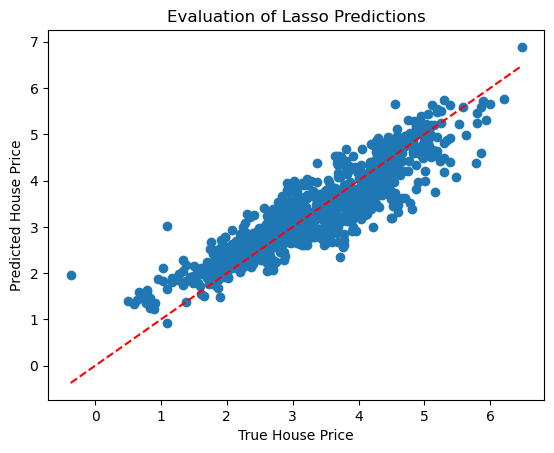

In [11]:
# let's evaluate our predictions respect to the real price
plt.scatter(y_test, lin_model.predict(X_test))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', linestyle = '--')
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')
plt.show()

We can see that our model is doing a pretty good job at estimating house prices.

In [12]:
y_test.reset_index(drop = True)

,Price_in_millions
0,1.335001
1,3.960813
2,2.833213
3,1.945910
4,2.694627
...,...
977,4.430817
978,1.945910
979,1.945910
980,2.251292


In [13]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

y_test.reset_index(drop = True, inplace = True)

preds = pd.Series(lin_model.predict(X_test))

preds

0      1.749912
1      3.337842
2      3.670877
3      2.130778
4      3.391424
         ...   
977    4.656228
978    2.056425
979    2.344414
980    2.297100
981    3.324256
Length: 982, dtype: float64

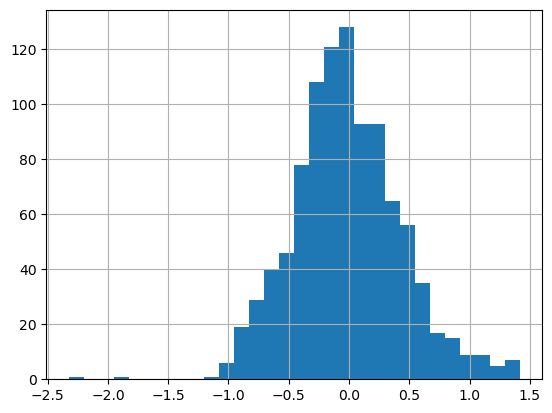

In [14]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test['Price_in_millions'] - preds
errors.hist(bins = 30)
plt.show()

The distribution of the errors follows quite closely a gaussian distribution. That suggests that our model is doing a good job as well.

### Feature importance

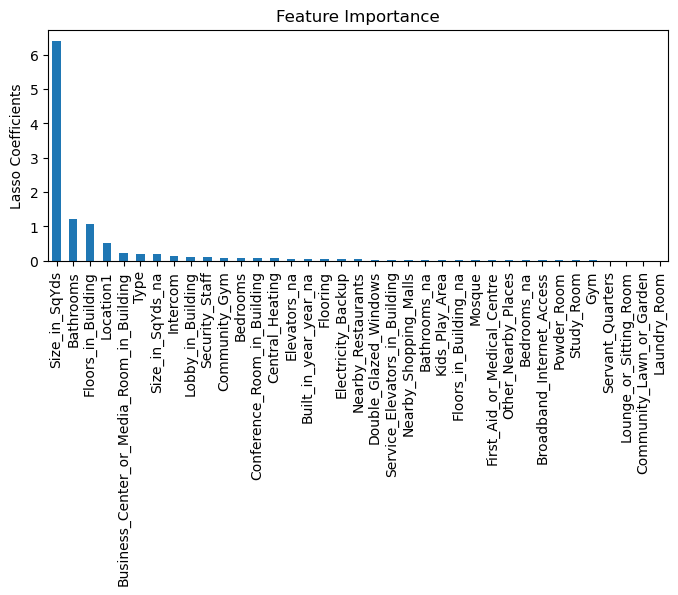

In [15]:
# Finally, just for fun, let's look at the feature importance

importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace = True, ascending = False)
importance.plot.bar(figsize = (8, 3))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')
plt.show()

In [16]:
test = np.exp(y_test)
#test

In [17]:
predictions = pd.DataFrame(np.exp(preds), columns = ['Predictions'])
#predictions.head()

In [18]:
errors = predictions['Predictions'] - test['Price_in_millions']

In [19]:
errors = pd.DataFrame(errors, columns = ['Errors'])

In [20]:
df_pred = pd.concat([test, predictions, errors], axis = 1)
df_pred.head(50)

,Price_in_millions,Predictions,Errors
0,3.8,5.754096,1.954096
1,52.5,28.158290,-24.341710
2,17.0,39.286352,22.286352
3,7.0,8.421414,1.421414
4,14.8,29.708224,14.908224
5,175.0,43.055781,-131.944219
6,2.8,6.264652,3.464652
7,22.5,17.150602,-5.349398
8,22.5,20.165727,-2.334273
9,115.0,139.305140,24.305140


In [21]:
df_pred.loc[(df_pred['Errors'] > 0) & (df_pred['Errors'] < 1)]

,Price_in_millions,Predictions,Errors
10,16.0,16.072633,0.072633
13,27.5,27.587442,0.087442
18,23.5,23.623970,0.123970
26,26.0,26.321276,0.321276
41,42.5,43.413132,0.913132
...,...,...,...
930,10.0,10.175699,0.175699
948,6.5,7.303453,0.803453
960,15.8,16.698696,0.898696
978,7.0,7.817971,0.817971


In [22]:
df_pred.to_csv('../Data/predictions.csv')

## Save the Model

In [23]:
# we are happy to our model, so we save it to be able
# to score new data

joblib.dump(lin_model, '../Models/lasso_reg.joblib') 

['../Models/lasso_reg.joblib']